<a href="https://colab.research.google.com/github/pruthviraj2453/PCA_FLDA/blob/main/PCA_and_FLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from scipy import linalg
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np


# Helper plotter function

In [ ]:
"""Plot functions:"""

def plot_data(a, b):
    plt.figure()
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    #plt.plot(mu_a, mu_b, 'black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Class 1', 'Class 2', 'Means'])
    plt.show()

def plot_all_vectors(a, b, vectors, w):
    mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
    mid_point = (mu_a + mu_b)/2

    vector = vectors[:, 0]
    slope_pca = vector[1]/vector[0]
    c_pca = mid_point[1] - slope_pca*mid_point[0]

    slope = w[1]/w[0]
    c = mid_point[1] - slope*mid_point[0]

    x = np.linspace(xmin+1, xmax+1, 100)
    z = np.linspace(xmin+1, xmax+1, 100)

    plt.figure()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    plt.plot(x, slope*x + c)
    plt.plot(z, slope_pca*z + c_pca)
    #plt.plot(mu_a, mu_b, 'black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Class 1', 'Class 2', 'FisherLDA vector', 'PCA vector'])
    plt.show()

def plot_flda_vectors(a, b, vectors, w):
    mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
    mid_point = (mu_a + mu_b)/2

    vector = vectors[:, 0]
    slope_pca = vector[1]/vector[0]
    c_pca = mid_point[1] - slope_pca*mid_point[0]

    slope = w[1]/w[0]
    c = mid_point[1] - slope*mid_point[0]

    x = np.linspace(xmin+1, xmax+1, 100)
    z = np.linspace(xmin+1, xmax+1, 100)

    plt.figure()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    plt.plot(x, slope*x + c)
    #plt.plot(z, slope_pca*z + c_pca)
    #plt.plot(mu_a, mu_b, 'black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Class 1', 'Class 2', 'FisherLDA vector'])
    plt.show()

def plot_pca_vectors(a, b, vectors, w):
    mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
    mid_point = (mu_a + mu_b)/2

    vector = vectors[:, 0]
    slope_pca = vector[1]/vector[0]
    c_pca = mid_point[1] - slope_pca*mid_point[0]

    slope = w[1]/w[0]
    c = mid_point[1] - slope*mid_point[0]

    x = np.linspace(xmin+1, xmax+1, 100)
    z = np.linspace(xmin+1, xmax+1, 100)

    plt.figure()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    #plt.plot(x, slope*x + c)
    plt.plot(z, slope_pca*z + c_pca)
    #plt.plot(mu_a, mu_b, 'black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Class 1', 'Class 2', 'PCA vector'])
    plt.show()

def plot_proj(name, argument, METHOD="Manual"):
    plt.figure()
    if name == 'pca':
        Xproj_pca_n1 = argument[:n1]
        Xproj_pca_n2 = argument[n1:n2]
        plt.hist(Xproj_pca_n1, color='red', ec='black')
        plt.hist(Xproj_pca_n2, color='blue', ec='black')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Projection of points onto PCA vector {METHOD}')
        plt.show()
    else :
        Xproj_fish_n1 = argument[:n1]
        Xproj_fish_n2 = argument[n1:n2]
        plt.hist(Xproj_fish_n1, color='red', ec='black')
        plt.hist(Xproj_fish_n2, color='blue', ec='black')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Projection of points onto Fisher vector {METHOD}')
        plt.show()

# Generate Dataset

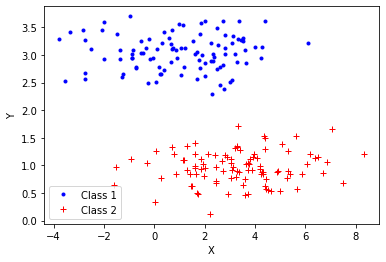

In [ ]:

# Generate Dataset:

n = 100
np.random.seed(0)
a = np.random.multivariate_normal((1, 3), [[4.0, 0.01],
                                           [0.01, 0.1]], n)

b = np.random.multivariate_normal((3, 1), [[4.0, 0.01],
                                           [0.01, 0.1]], n)

X = np.vstack((a, b))

Y = np.hstack((np.zeros(n), np.ones(n)))

mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)

xmax = np.max(X[:, 0])
xmin = np.min(X[:, 0])
ymax = np.max(X[:, 1])
ymin = np.min(X[:, 1])

n1 = 100
n2 = 200


"""Data"""

plot_data(a, b)

# Principal Components Analysis (PCA)

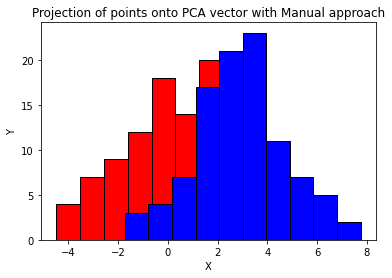

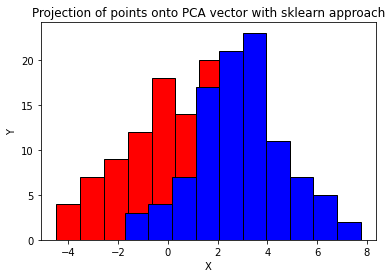

In [ ]:

# a)
def pca_sklearn(X, Y):
    pca = PCA(n_components=1)
    X_fit = pca.fit(X)
    X_tran = pca.transform(X)
    return X_fit, X_tran

def Xproj_pca_sk_cal(X_fit):
  weights = X_fit.components_
  Xproj_pca_sk = X.dot(weights.T)
  return Xproj_pca_sk

# b)

def pca_manual(X, Y):
    # calculate the mean of each column
    M = mean(X.T, axis=1)
    # center columns by subtracting column means
    C = M - X
    # calculate covariance matrix of centered matrix
    V = cov(C.T)
    # eigendecomposition of covariance matrix
    values, vectors = eig(V)
    # project data
    P = vectors.T.dot(C.T)

    return vectors

def Xproj_pca_man_cal(X, vectors):
  vector = vectors[:, 0]
  Xproj_pca = X.dot(vector)
  Xproj_pca_n1 = Xproj_pca[:n1]
  Xproj_pca_n2 = Xproj_pca[n1:n2]
  return Xproj_pca, Xproj_pca_n1, Xproj_pca_n2





"""PCA"""

X_fit, X_tran = pca_sklearn(X, Y)
vectors = pca_manual(X, Y)

Xproj_pca_sk = Xproj_pca_sk_cal(X_fit)
Xproj_pca_man, Xproj_pca_n1, Xproj_pca_n2 = Xproj_pca_man_cal(X, vectors)
Xproj_pca_man = Xproj_pca_man.reshape(-1, 1)
assert np.allclose(Xproj_pca_sk, Xproj_pca_man)

plot_proj('pca', Xproj_pca_man, "with Manual approach")
plot_proj('pca', Xproj_pca_man, "with sklearn approach")


# Fisher LDA

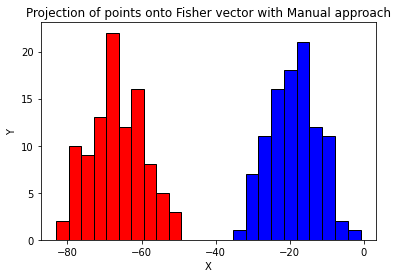

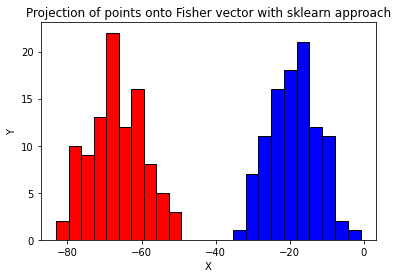

In [ ]:


"""
Fisher LDA
It is done in 2 ways:
a) Using sklearn.discriminant
b) manual calculation

"""

# a)
def flda_sklearn(X, Y):
    lda = LinearDiscriminantAnalysis()
    X_fit = lda.fit(X, Y)
    X_tran = lda.transform(X)
    w_sk = X_fit.coef_
    return X_tran, X_fit, w_sk

def Xproj_fish_sk_cal(w_sk):
    slope = w_sk[0, 1]/w_sk[0, 0]
    Xproj_fish_sk = X.dot(w_sk.T)
    return Xproj_fish_sk

# b)

def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)

def flda_manual(a, b):
    # Covariance matrices of the two datasets
    cov1 = calculate_covariance_matrix(a)
    cov2 = calculate_covariance_matrix(b)
    cov_tot = (cov1 + cov2)/2

    # Mean of the two datasets
    mean1 = a.mean(0)
    mean2 = b.mean(0)
    mean_diff = np.atleast_1d(mean1 - mean2)

    # The vector w, which when X is projected onto it best separates the data by class.
    # w = (mean1 - mean2) / (cov1 + cov2) [Formula in topic 9.2.6.1 in the book]
    # MINIMIZE THE VARIANCES AND MAXIMIZE THE DIFFERENCE BETWEEN THE MEANS

    w = -np.linalg.pinv(cov_tot).dot(mean_diff)

    return w

def Xproj_fish_man_cal(X, w):
    Xproj_fish = X.dot(w)
    Xproj_fish_n1 = Xproj_fish[:n1]
    Xproj_fish_n2 = Xproj_fish[n1:n2]
    return Xproj_fish, Xproj_fish_n1, Xproj_fish_n2

"""FLDA"""

X_tran, X_fit, w_sk = flda_sklearn(X, Y)
w = flda_manual(a, b)

Xproj_fish_sk = Xproj_fish_sk_cal(w_sk)
Xproj_fish_man, Xproj_fish_n1, Xproj_fish_n2 = Xproj_fish_man_cal(X, w)
Xproj_fish_man = Xproj_fish_man.reshape(-1, 1)
assert np.allclose(Xproj_fish_sk, Xproj_fish_man)


plot_proj('flda', Xproj_fish_man, "with Manual approach")
plot_proj('flda', Xproj_fish_sk, "with sklearn approach")



# Plots of vectors

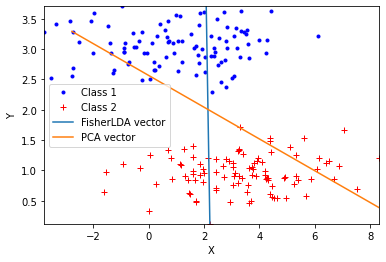

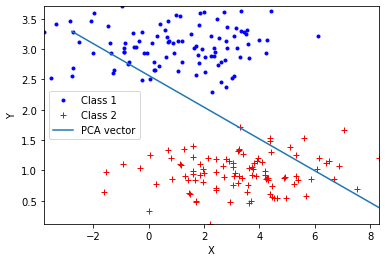

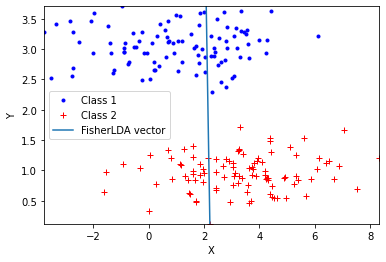

In [ ]:
"""Plot of vectors"""

plot_all_vectors(a, b, vectors, w)
plot_pca_vectors(a, b, vectors, w)
plot_flda_vectors(a, b, vectors, w)